In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
sns.set()
import sys

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
ss = pd.read_csv('sample_submission.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
train.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [7]:
train_copy = train.copy()

In [8]:
train1 = train_copy.drop('SalePrice', axis=1)

## Combining training and testing data for cleaning

In [9]:
combine = pd.concat([train1,test],axis=0).reset_index(drop=True)

In [10]:
combine.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [11]:
train.shape, test.shape, ss.shape, combine.shape

((1460, 81), (1459, 80), (1459, 2), (2919, 80))

## Dealing with missing values

<AxesSubplot:>

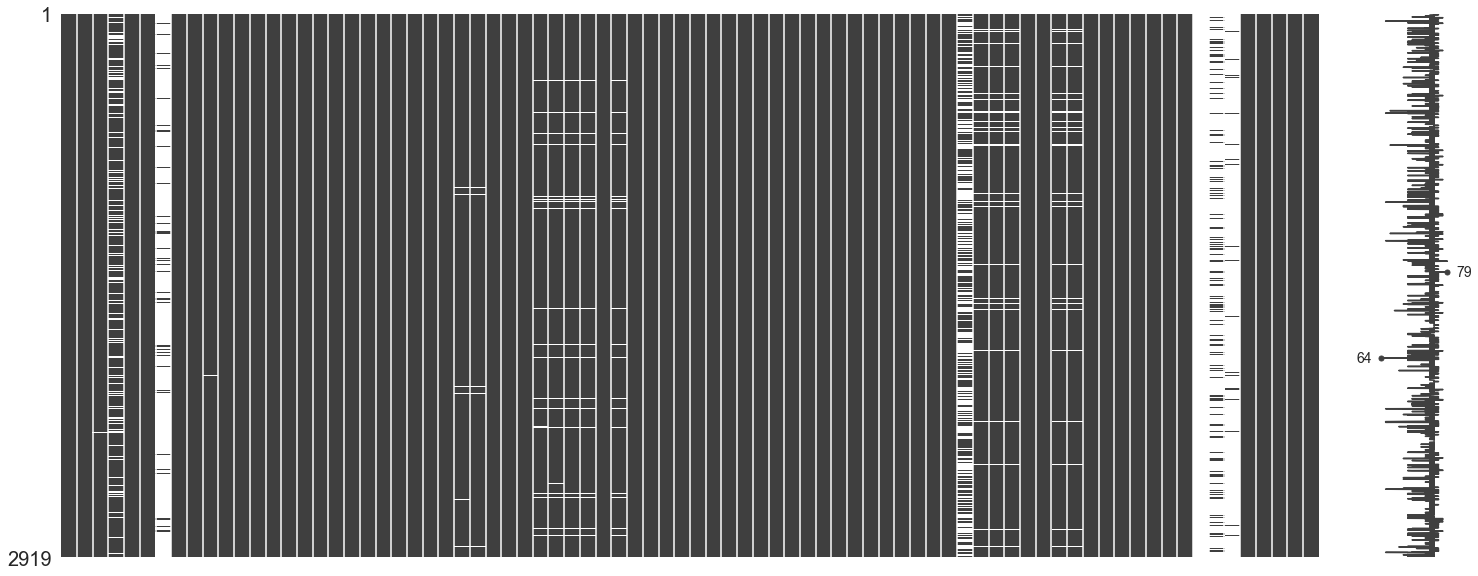

In [12]:
missingno.matrix(combine)

In [13]:
# checking for missing values
null_values = combine.isnull().sum().sort_values(ascending=False)

In [14]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
display(null_values)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
LotFrontage       486
GarageYrBlt       159
GarageFinish      159
GarageQual        159
GarageCond        159
GarageType        157
BsmtExposure       82
BsmtCond           82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
Functional          2
BsmtHalfBath        2
BsmtFullBath        2
Utilities           2
GarageCars          1
KitchenQual         1
BsmtFinSF1          1
SaleType            1
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Exterior2nd         1
Exterior1st         1
GarageArea          1
Electrical          1
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
Id                  0
HalfBath            0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea  

In [17]:
### Fixing missing values didn't work apropriately because the code ran but the code seems imutable even after using inplace = True
for x in combine.columns:
    dropped = []
    int_fill = []
    obj_fill =[]
    null_free = []
    # if Missing value is greater than 10% drop column
    if ((combine[x].isnull().sum())> (combine.shape[0]/10))==True:
        combine.drop(x, axis = 1, inplace =True)
        dropped.append(x)
        print('Droped' ,dropped)
        
    # if missing val. is <10% and is an integer or float fill missing val with mean value 
    
    elif ((combine[x].isnull().sum()>=1) & ((combine[x].dtype=='int64')|(combine[x].dtype=='float64')))==True:
        combine[x].fillna(combine[x].mean(), inplace=True)
        int_fill.append(x)
        print('Intergers Filled',int_fill)
        
    # if missing value datatype is not interger or float
    elif (combine[x].isnull().sum()>=1):
        combine[x].fillna(combine[x].mode().values[0], inplace=True)
        obj_fill.append(x)
        print('Objects Filled',obj_fill)
    else:
        null_free.append(x)
    

Objects Filled ['MSZoning']
Droped ['LotFrontage']
Droped ['Alley']
Objects Filled ['Utilities']
Objects Filled ['Exterior1st']
Objects Filled ['Exterior2nd']
Objects Filled ['MasVnrType']
Intergers Filled ['MasVnrArea']
Objects Filled ['BsmtQual']
Objects Filled ['BsmtCond']
Objects Filled ['BsmtExposure']
Objects Filled ['BsmtFinType1']
Intergers Filled ['BsmtFinSF1']
Objects Filled ['BsmtFinType2']
Intergers Filled ['BsmtFinSF2']
Intergers Filled ['BsmtUnfSF']
Intergers Filled ['TotalBsmtSF']
Objects Filled ['Electrical']
Intergers Filled ['BsmtFullBath']
Intergers Filled ['BsmtHalfBath']
Objects Filled ['KitchenQual']
Objects Filled ['Functional']
Droped ['FireplaceQu']
Objects Filled ['GarageType']
Intergers Filled ['GarageYrBlt']
Objects Filled ['GarageFinish']
Intergers Filled ['GarageCars']
Intergers Filled ['GarageArea']
Objects Filled ['GarageQual']
Objects Filled ['GarageCond']
Droped ['PoolQC']
Droped ['Fence']
Droped ['MiscFeature']
Objects Filled ['SaleType']


<AxesSubplot:>

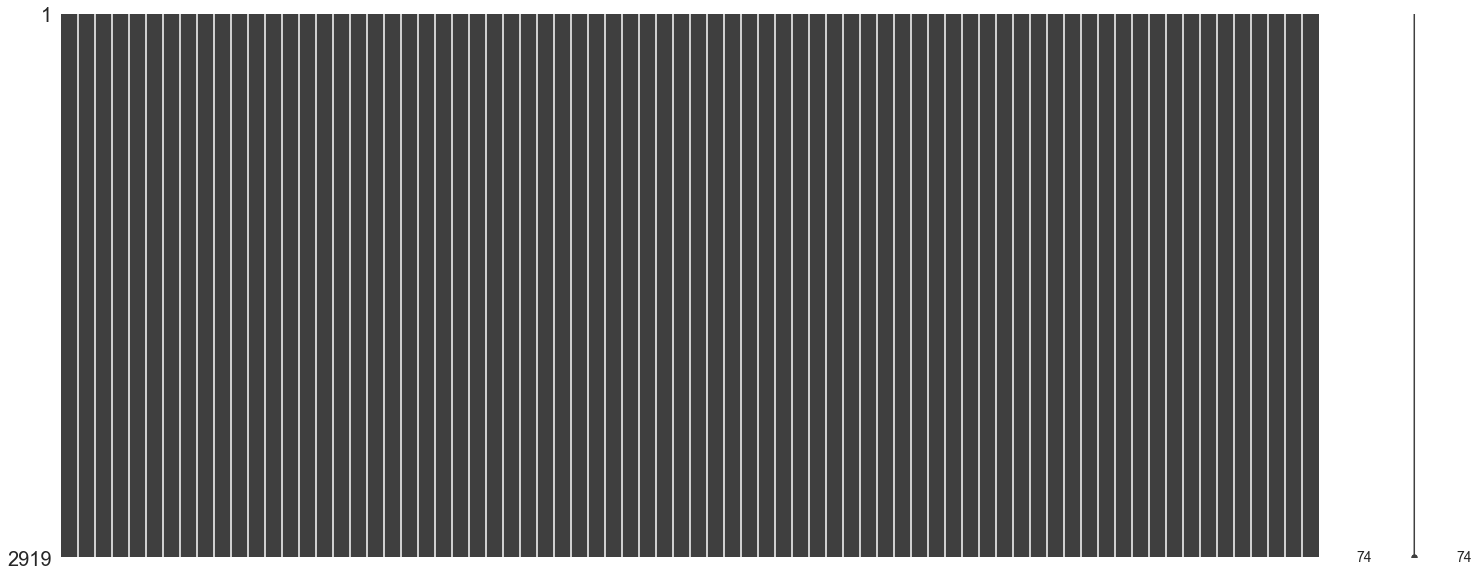

In [18]:
missingno.matrix(combine)

In [51]:
combine_cleaned = combine.copy()

# Creating dummies for categorical variables 

In [158]:
with_dummies = pd.get_dummies(combine_cleaned, drop_first =True)

In [160]:
with_dummies.shape

(2919, 232)

In [184]:
no_dup = with_dummies.drop_duplicates()

In [183]:
#no_multicore = with_dummies.drop(['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition'], axis = 1)

In [162]:
# to be handled in my second submission
def objs():
    for x in combine_cleaned.columns:
        obj = []
        if (combine_cleaned[x].dtype=='O')==True:
            obj.append(x)
            print(obj)
objs()

## SEPERATING CLEANED TRAINING AND TESTING DATA

In [195]:
no_dup.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [191]:
combine_clean = no_dup.drop(['Id'], axis=1)

In [140]:
train.shape, test.shape, combine.shape

((1460, 81), (1459, 80), (2919, 74))

In [217]:
xtrain = combine_clean.loc[:1459]
xtrain.shape

(1460, 231)

In [219]:
xtest = combine_clean.loc[1460:]
xtest.shape

(1459, 231)

In [220]:
ytrain = train['SalePrice']
ytrain.shape

(1460,)

In [221]:
ytrain.isnull().sum()

0

# MODELLING AND PREDICTING HOUSE PRICE 

In [222]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

In [223]:
dtc = DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
pred = dtc.predict(xtest)
dtc_accuracy = round(dtc.score(xtrain,ytrain)*100,2)
dtc_accuracy

100.0

In [224]:
pred

array([117500, 145250, 192000, ..., 162000, 123600, 339750], dtype=int64)

In [199]:
cat = CatBoostClassifier()
cat.fit(xtrain,ytrain)
pred = cat.predict(xtest)
cat_accuracy = round(cat.score(xtrain,ytrain)*100,2)
cat_accuracy

Learning rate set to 0.080669
0:	learn: 6.4626922	total: 9.21s	remaining: 2h 33m 26s
1:	learn: 6.4291703	total: 17.2s	remaining: 2h 23m 5s
2:	learn: 6.3981732	total: 27.6s	remaining: 2h 33m 1s
3:	learn: 6.3641328	total: 36.1s	remaining: 2h 29m 57s
4:	learn: 6.3344714	total: 45.2s	remaining: 2h 30m 4s
5:	learn: 6.2960529	total: 53.7s	remaining: 2h 28m 16s
6:	learn: 6.2651914	total: 1m 1s	remaining: 2h 26m 22s
7:	learn: 6.2369663	total: 1m 11s	remaining: 2h 27m 20s
8:	learn: 6.2046277	total: 1m 19s	remaining: 2h 26m 10s
9:	learn: 6.1772979	total: 1m 27s	remaining: 2h 25m 11s
10:	learn: 6.1461819	total: 1m 38s	remaining: 2h 27m 1s
11:	learn: 6.1171033	total: 1m 48s	remaining: 2h 29m 18s
12:	learn: 6.0896353	total: 1m 57s	remaining: 2h 28m 45s
13:	learn: 6.0600438	total: 2m 7s	remaining: 2h 29m 34s
14:	learn: 6.0300123	total: 2m 17s	remaining: 2h 30m 14s
15:	learn: 5.9977927	total: 2m 25s	remaining: 2h 29m 24s
16:	learn: 5.9687832	total: 2m 35s	remaining: 2h 29m 58s
17:	learn: 5.9382228	to

99.93

In [203]:
ss.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [225]:
ss['Prediction'] = pred

In [234]:
ss['difference'] = round(abs(((ss['SalePrice'] - ss['Prediction'])/ss['SalePrice'])*100),2)

In [238]:
ss.head()

,Id,SalePrice,Prediction,difference
0,1461,169277.052498,117500,30.59
1,1462,187758.393989,145250,22.64
2,1463,183583.683570,192000,4.58
3,1464,179317.477511,192000,7.07
4,1465,150730.079977,185000,22.74


In [239]:
submit_pred = ss.drop(['SalePrice','difference'], axis=1)

In [240]:
submit_pred.columns = ['Id','SalePrice']

In [241]:
submit = submit_pred

In [242]:
submit.head()

,Id,SalePrice
0,1461,117500
1,1462,145250
2,1463,192000
3,1464,192000
4,1465,185000


In [244]:
submit.to_csv('c:/users/user/Desktop/HousePrice_Submission.csv', index=False)